<a href="https://colab.research.google.com/github/KellyPared/deep-learning-challenge/blob/main/AlphabetSoupNormalize%26add_moreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
#df.head()

In [ ]:

# drop unnecessary columns
df = df.drop(columns=['EIN', 'NAME'])

# separate the target variable
y = df.pop('IS_SUCCESSFUL')
df = df.select_dtypes(include=[float, int])


# normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(df)

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# define neural network model and compile it
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
858/858 [==============================] - 6s 3ms/step - loss: 0.6951 - accuracy: 0.5328 - val_loss: 0.6909 - val_accuracy: 0.5351
Epoch 2/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6935 - accuracy: 0.5337 - val_loss: 0.6921 - val_accuracy: 0.5351
Epoch 3/100
858/858 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.5331 - val_loss: 0.6908 - val_accuracy: 0.5350
Epoch 4/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6927 - accuracy: 0.5322 - val_loss: 0.6913 - val_accuracy: 0.5351
Epoch 5/100
858/858 [==============================] - 3s 3ms/step - loss: 0.6923 - accuracy: 0.5326 - val_loss: 0.6913 - val_accuracy: 0.5350
Epoch 6/100
858/858 [==============================] - 3s 3ms/step - loss: 0.6914 - accuracy: 0.5334 - val_loss: 0.6912 - val_accuracy: 0.5353
Epoch 7/100
858/858 [==============================] - 3s 4ms/step - loss: 0.6933 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5353

858/858 [==============================] - 3s 4ms/step - loss: 0.6905 - accuracy: 0.5360 - val_loss: 0.6902 - val_accuracy: 0.5385
Epoch 24/100
858/858 [==============================] - 4s 4ms/step - loss: 0.6905 - accuracy: 0.5360 - val_loss: 0.6903 - val_accuracy: 0.5378
Epoch 25/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6907 - accuracy: 0.5355 - val_loss: 0.6903 - val_accuracy: 0.5379
Epoch 26/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6905 - accuracy: 0.5364 - val_loss: 0.6902 - val_accuracy: 0.5378
Epoch 27/100
858/858 [==============================] - 3s 3ms/step - loss: 0.6905 - accuracy: 0.5368 - val_loss: 0.6902 - val_accuracy: 0.5378
Epoch 28/100
858/858 [==============================] - 3s 3ms/step - loss: 0.6904 - accuracy: 0.5356 - val_loss: 0.6902 - val_accuracy: 0.5386
Epoch 29/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6905 - accuracy: 0.5364 - val_loss: 0.6902 - val_accuracy: 0.5389
Epoch

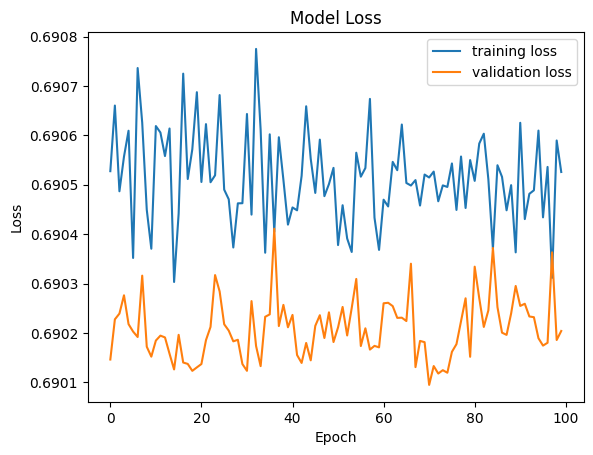

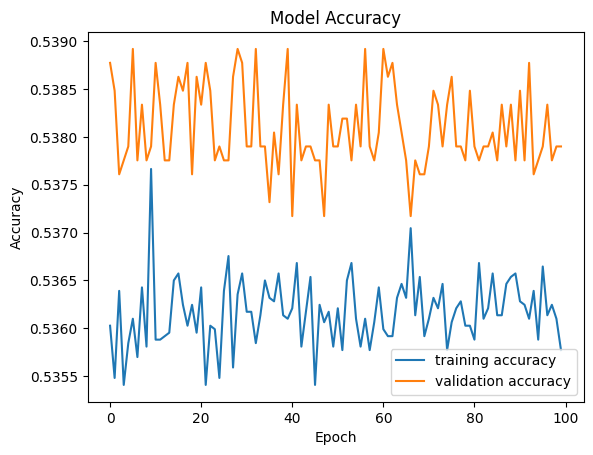

In [ ]:
import matplotlib.pyplot as plt


# plot the loss history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy history
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
plt.savefig('trainng_plot.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
new_data = df.copy()


In [ ]:

# Split the new data into training and testing sets, using all as training data
new_X_train, new_y_train = new_data, np.ones(len(new_data))
new_X_test, new_y_test = train_test_split(new_data, test_size=.30, random_state=42)

In [ ]:
#add more training 

# Combine the existing and new training data
X_train = np.concatenate((X_train, new_X_train), axis=0)
y_train = np.concatenate((y_train, new_y_train), axis=0)


In [ ]:

# Shuffle the combined data
shuffle_idx = np.random.permutation(len(X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

In [ ]:


# Train the model on the combined data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1930/1930 [==============================] - 6s 3ms/step - loss: 7.6112 - accuracy: 0.7922 - val_loss: 0.6902 - val_accuracy: 0.5389
Epoch 2/100
1930/1930 [==============================] - 6s 3ms/step - loss: 0.3203 - accuracy: 0.7933 - val_loss: 0.6902 - val_accuracy: 0.5382
Epoch 3/100
1930/1930 [==============================] - 5s 3ms/step - loss: 0.3076 - accuracy: 0.7935 - val_loss: 0.6902 - val_accuracy: 0.5379
Epoch 4/100
1930/1930 [==============================] - 6s 3ms/step - loss: 0.3074 - accuracy: 0.7935 - val_loss: 0.6902 - val_accuracy: 0.5378
Epoch 5/100
1930/1930 [==============================] - 6s 3ms/step - loss: 0.3082 - accuracy: 0.7931 - val_loss: 0.6902 - val_accuracy: 0.5382
Epoch 6/100
1930/1930 [==============================] - 7s 3ms/step - loss: 0.3248 - accuracy: 0.7936 - val_loss: 0.6902 - val_accuracy: 0.5383
Epoch 7/100
1930/1930 [==============================] - 8s 4ms/step - loss: 0.3076 - accuracy: 0.7933 - val_loss: 0.6902 - val_ac

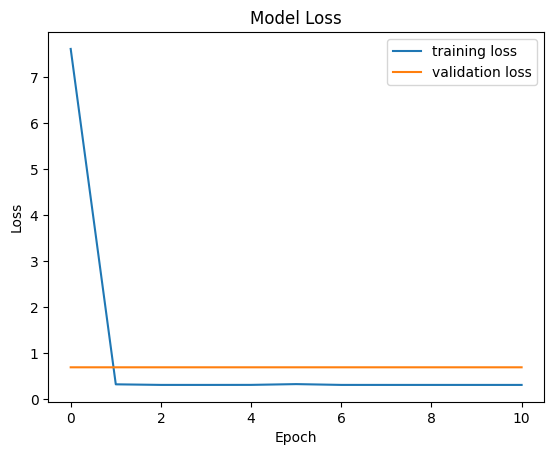

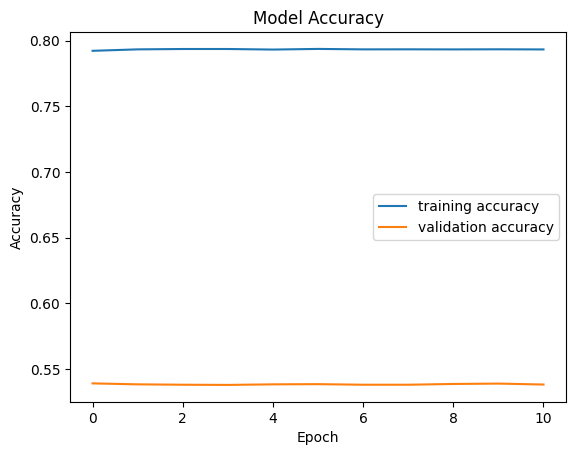

In [ ]:
# plot the loss history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy history
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:


# Define the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(X_train[0])]),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/50
1930/1930 [==============================] - 7s 3ms/step - loss: 223.9623 - accuracy: 0.7889 - val_loss: 0.6918 - val_accuracy: 0.5341
Epoch 2/50
1930/1930 [==============================] - 7s 4ms/step - loss: 0.3197 - accuracy: 0.7918 - val_loss: 0.6914 - val_accuracy: 0.5341
Epoch 3/50
1930/1930 [==============================] - 6s 3ms/step - loss: 0.5373 - accuracy: 0.7920 - val_loss: 0.6920 - val_accuracy: 0.5341
Epoch 4/50
1930/1930 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.7920 - val_loss: 0.6910 - val_accuracy: 0.5341
Epoch 5/50
1930/1930 [==============================] - 7s 3ms/step - loss: 0.3138 - accuracy: 0.7920 - val_loss: 0.6912 - val_accuracy: 0.5341
Epoch 6/50
1930/1930 [==============================] - 6s 3ms/step - loss: 0.3094 - accuracy: 0.7918 - val_loss: 0.6909 - val_accuracy: 0.5341
Epoch 7/50
1930/1930 [==============================] - 6s 3ms/step - loss: 0.3086 - accuracy: 0.7920 - val_loss: 0.6909 - val_accurac

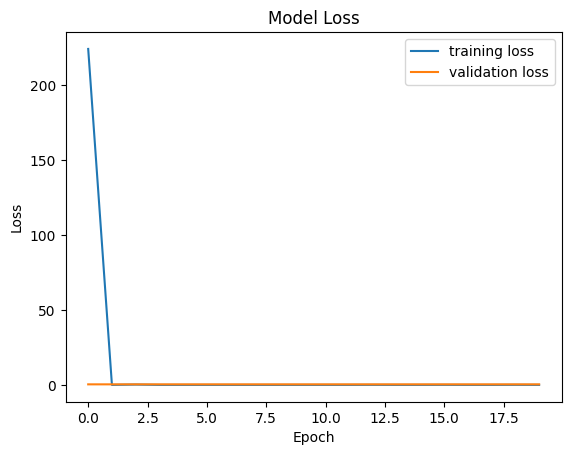

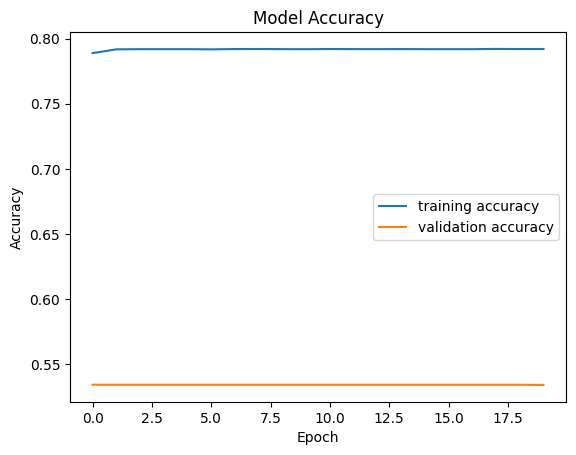

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy history
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig("model_loss.png")